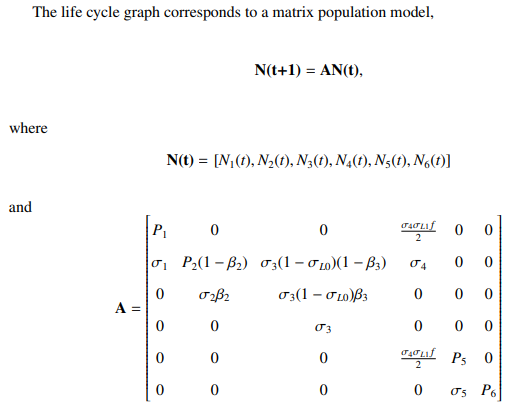

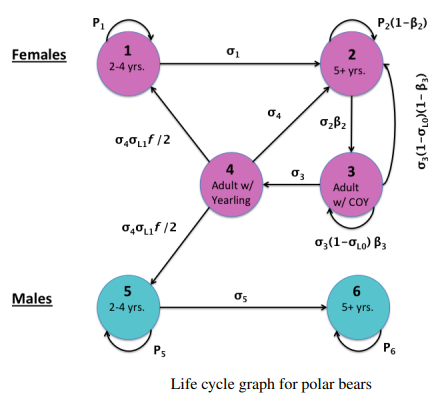

In [15]:
simulation_years = 500                                # time measured in years

# INITIAL POPULATIONS
population_females_sub_adult = 100                    # N_1(t) | state 1
population_females_prime_adult = 300                  # N_2(t) | state 2
population_females_coy = 100                          # N_3(t) | state 3
population_females_yearlings = 100                    # N_4(t) | state 4
population_males_sub_adult = 100                      # N_5(t) | state 5
population_males_prime_adult = 300                    # N_6(t) | state 6

# STATE REMAINING PROBABILITIES
remaining_probability_1 = 0.547                       # P_1
remaining_probability_2 = 0.94                        # P_2
remaining_probability_5 = 0.5                         # P_5
remaining_probability_6 = 0.9                         # P_6

# STATE CHANGE SURVIVING PROBABILITES
surviving_probability_1_to_2 = 0.273                  # σ_1
surviving_probability_2_to_3 = 0.94                   # σ_2
surviving_probability_3_to_4 = 0.94                   # σ_3

# STATE CHANGE PROBABILITIES
moving_probability_4_to_2 = 0.25                      # σ_4
moving_probability_5_to_6 = 0.273                     # σ_5

# CUB LITTER SURVIVING PROBABILITIES
coy_survival_probability = 0.676                      # σ_L0
yearling_survival_probability = 0.755                 # σ_L1

# BREEDING PROBABILITIES
breeding_females_probability = 0.31                   # β_2
breeding_lose_coy_probability = 0.05                  # β_3

# SUCCESFUL LITTER AVERAGE CUBS
success_cubs_in_litter = 1.1456                       # f, average
one_cub_litter_probability = 0.53                     # c_1
two_cub_litter_probability = 0.47                     # c_2

In [18]:
import random

import pandas as pd


class FemaleBear():
    """"""

    def __init__(self, age = 0, state = 0, coy = True, yearling = False, 
                 breed = False, breeding = False, coys = [], yearlings = []):
        self.age = age
        self.state = state
        self.is_coy = coy
        self.is_yearling = yearling
        self.breed_able = breed
        self.breeding = breeding
        self.coys = coys
        self.yearlings = yearlings


class MaleBear():
    """"""

    def __init__(self, age = 0, state = 0, coy = True, yearling = False):
        self.age = age
        self.state = state
        self.is_coy = coy
        self.is_yearling = yearling


class Habitat():
    """"""

    def __init__(self):
        self.sub_adult_females = self._generate_sub_adult_females()
        self.prime_adult_females = self._generate_prime_adult_females()
        self.sub_adult_males = self._generate_sub_adult_males()
        self.prime_adult_males = self._generate_prime_adult_males()
        self.coy_females = self._generate_coy_females()
        self.yearling_females = self._generate_yearling_females()
        self.check_females_cubs()

    def year_step(self):
        for bear in self.sub_adult_females:
            bear.age = bear.age + 1
            if bear.age > 4:
                if random.uniform(0,1) < surviving_probability_1_to_2:
                    bear.state = 2
                    self.prime_adult_females.append(bear)
                self.sub_adult_females.remove(bear)
            else:
                if random.uniform(0,1) > remaining_probability_1:
                    self.sub_adult_females.remove(bear)

        for bear in self.prime_adult_females:
            bear.age = bear.age + 1
            if random.uniform(0,1) < remaining_probability_2:
                if random.uniform(0,1) < breeding_females_probability:
                    if random.uniform(0,1) < surviving_probability_2_to_3:
                        bear.state = 3
                        bear.breed_able = False
                        bear.breeding = True
                        bear.coys = self._generate_coys()
                        self.coy_females.append(bear)
                    else:
                        self.prime_adult_females.remove(bear)
            else:
                self.prime_adult_females.remove(bear)

        for bear in self.coy_females:
            bear.age = bear.age + 1
            if random.uniform(0,1) < surviving_probability_3_to_4:
                bear.state = 4
                bear.yearlings = bear.coys
                bear.coys = []
                self.yearling_females.append(bear)
            self.coy_females.remove(bear)

        for bear in self.yearling_females:
            bear.age = bear.age + 1
            if random.uniform(0,1) < moving_probability_4_to_2:
                bear.state = 2
                bear.yearlings = self._death_yearlings(bear.yearlings)
                bear.breed_able = True
                bear.breeding = False
                self.prime_adult_females.append(bear)
            self.yearling_females.remove(bear)

        for bear in self.sub_adult_males:
            bear.age = bear.age + 1
            if bear.age > 4:
                if random.uniform(0,1) < moving_probability_5_to_6:
                    bear.state = 6
                    self.prime_adult_males.append(bear)
                self.sub_adult_males.remove(bear)
            else:
                if random.uniform(0,1) > remaining_probability_5:
                    self.sub_adult_males.remove(bear)

        for bear in self.prime_adult_males:
            bear.age = bear.age + 1
            if random.uniform(0,1) > remaining_probability_6:
                self.prime_adult_males.remove(bear)

    def get_population_data(self):
        return {
            "sub_adult_females": len(self.sub_adult_females),
            "prime_adult_females": len(self.prime_adult_females),
            "coy_females": len(self.coy_females),
            "yearling_females": len(self.yearling_females),
            "sub_adult_males": len(self.sub_adult_males),
            "prime_adult_males": len(self.prime_adult_males),
        }

    def check_females_cubs(self):
        for bear in self.coy_females:
            if len(bear.coys) == 0 and random.uniform(0,1) < breeding_lose_coy_probability:
                bear.breeding = False
                bear.breed_able = True
                bear.state = 2

        for bear in self.yearling_females:
            if len(bear.yearlings) == 0:
                bear.breeding = False
                bear.breed_able = True
                bear.state = 2

    def _generate_sub_adult_females(self):
        sub_adult_female_bears = []
        for bear in range(population_females_sub_adult):
            sub_adult_female_bears.append(
                FemaleBear(
                    age = random.randint(2, 4),
                    state = 1,
                    coy = False,
            ))
        return sub_adult_female_bears

    def _generate_prime_adult_females(self):
        prime_adult_female_bears = []
        for bear in range(population_females_prime_adult):
            prime_adult_female_bears.append(
                FemaleBear(
                    age = random.randint(5, 30),
                    state = 2,
                    coy = False,
                    breed = True,
            ))
        return prime_adult_female_bears

    def _generate_sub_adult_males(self):
        sub_adult_male_bears = []
        for bear in range(population_males_sub_adult):
            sub_adult_male_bears.append(
                MaleBear(
                    age = random.randint(2, 4),
                    state = 5,
                    coy = False,
                )
            )
        return sub_adult_male_bears

    def _generate_prime_adult_males(self):
        prime_adult_male_bears = []
        for bear in range(population_males_prime_adult):
            prime_adult_male_bears.append(
                MaleBear(
                    age = random.randint(5, 30),
                    state = 6,
                    coy = False,
                )
            )
        return prime_adult_male_bears

    def _generate_coy_females(self):
        coy_female_bears = []
        for bear in range(population_females_coy):
            coy_female_bears.append(
                FemaleBear(
                    age = random.randint(5, 30),
                    state = 3,
                    coy = False,
                    breeding = True,
                    coys = self._generate_coys(),
                )
            )
        return coy_female_bears

    def _generate_coys(self):
        coys = random.choices(
            population = [FemaleBear(), MaleBear()],
            weights = [0.5, 0.5],
            k = random.choices(
                    population = [1, 2],
                    weights = [0.53, 0.47],
                    k = 1
                )[0],
        )
        return self._death_coys(coys)

    def _death_coys(self, coys):
        for coy in coys:
            coy.age = coy.age + 1
            coy.is_coy = False
            coy.is_yearling = True
            if random.uniform(0, 1) > coy_survival_probability:
                coys.remove(coy)
        return coys

    def _generate_yearling_females(self):
        yearling_female_bears = []
        for bear in range(population_females_yearlings):
            yearling_female_bears.append(
                FemaleBear(
                    age = random.randint(5, 30),
                    state = 4,
                    coy = False,
                    breeding = True,
                    yearlings = self._generate_yearlings(initial_generation=True)
                )
            )
        return yearling_female_bears

    def _generate_yearlings(self, initial_generation=False):
        yearlings = random.choices(
            population = [FemaleBear(coy=False, yearling=True), 
                          MaleBear(coy=False, yearling=True)
                         ],
            weights = [0.5, 0.5],
            k = random.choices(
                    population = [1, 2],
                    weights = [0.53, 0.47],
                    k = 1
                )[0],
        )
        if initial_generation:
            self._death_coys(yearlings)
        return self._death_yearlings(yearlings)

    def _death_yearlings(self,yearlings):
        for yearling in yearlings:
            bear_type = type(yearling).__name__
            yearling.age = yearling.age + 1
            yearling.is_yearling = False
            if random.uniform(0, 1) < yearling_survival_probability:
                if bear_type == "FemaleBear":
                    yearling.state = 1
                    self.sub_adult_females.append(yearling)
                else:
                    yearling.state = 5
                    self.sub_adult_males.append(yearling)
            yearlings.remove(yearling)
        return yearlings


habitat = Habitat()
population_history = [habitat.get_population_data()]

for year in range(simulation_years):
    habitat.year_step()
    population_history.append(habitat.get_population_data())

population_history = pd.DataFrame(population_history)
population_history

,sub_adult_females,prime_adult_females,coy_females,yearling_females,sub_adult_males,prime_adult_males
0,128,300,100,100,131,300
1,86,301,87,90,83,272
2,55,297,82,82,56,251
3,35,297,79,80,32,229
4,23,301,74,76,23,212
...,...,...,...,...,...,...
496,0,0,0,0,0,0
497,0,0,0,0,0,0
498,0,0,0,0,0,0
499,0,0,0,0,0,0


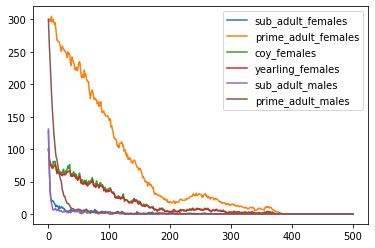

In [19]:
population_history.plot.line()